# Plots with Ollie's CDFS Data

In [3]:
# Import packages
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Import custom functions
from utils import white_viridis, scatter_colour_density

In [4]:
# Read in the data
data = pd.read_csv('DATA/Ollie Data/CDFS/results.txt', sep=r'\s{2,}', engine='python')
df = pd.DataFrame(data).dropna()

warnings.filterwarnings('ignore')   

In [9]:
# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True
# plt.rcParams['text.usetex'] = True

# SFR vs Mass

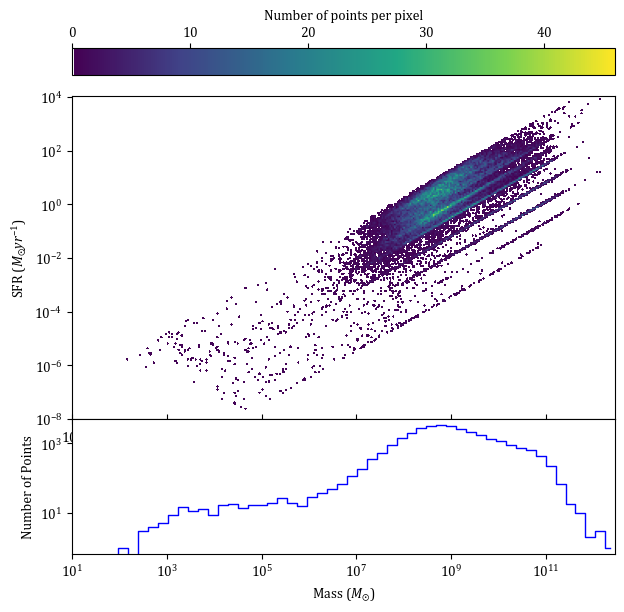

In [10]:
# Get mass and SFR
mass = df['bayes.stellar.m_star'] # 
sfr = df['bayes.sfh.sfr'] # instantaneous SFR
ssfr = sfr / mass # specific star formation rate

# Define bins for the bar graph
x_bins = np.logspace(np.log10(min(mass)), np.log10(max(mass)), 100)
counts, _ = np.histogram(mass, bins=x_bins)
x_centers = np.sqrt(x_bins[:-1] * x_bins[1:])

# Create a grid layout with 2 rows and 1 column
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.0)  # Set the vertical gap between subplots to 0

# Log-log Scatter plot
ax0 = plt.subplot(gs[0], projection='scatter_density')
density = ax0.scatter_density(mass, sfr, cmap=white_viridis)
plt.colorbar(density, label='Number of points per pixel', location='top')
ax0.loglog()
ax0.set_ylabel('SFR ($M_{☉} yr^{-1}$)')
ax0.set_xlim(left=1e1)
ax0.set_ylim(bottom=1e-8)

# Bar graph
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.step(x_centers, counts, where='mid', color='b', linewidth=1)
ax1.loglog()
ax1.set_xlabel('Mass ($M_{☉}$)')
ax1.set_ylabel('Number of Points')
ax1.get_xaxis().set_ticks_position('both')

# Show the plot
plt.show()

# AGN Fraction vs SFR

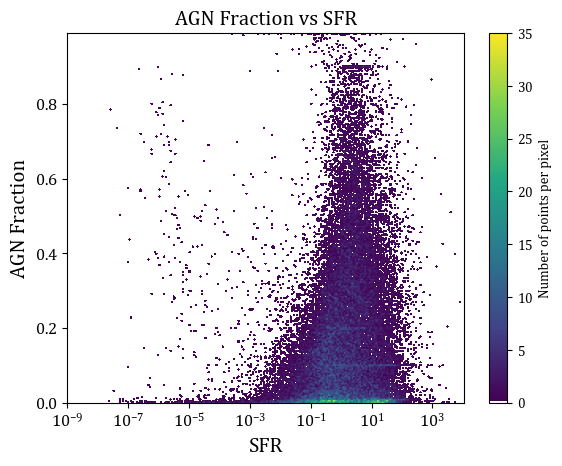

In [11]:
# Get SFR and AGN Fraction
AGN_frac = df['bayes.agn.fracAGN']
sfr = df['bayes.sfh.sfr']

# Plot SFR vs AGN Fraction
# plt.scatter(sfr, AGN_frac, s=1)
fig = plt.figure()
scatter_colour_density(fig, sfr, AGN_frac)
plt.title('AGN Fraction vs SFR', fontsize=15)
plt.xlabel('SFR', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.xlim(left=1e-9)
plt.show()

# SFR vs Age

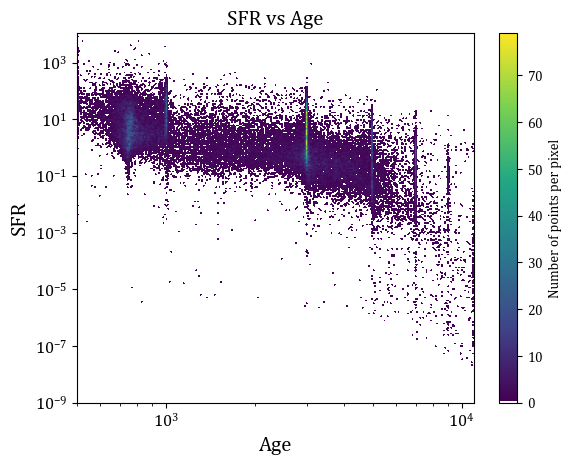

In [12]:
# Get SFR and Age
age = df['bayes.sfh.age']
sfr = df['bayes.sfh.sfr']

# Plot SFR vs Age
# plt.scatter(age, sfr, s=1)
fig = plt.figure()
scatter_colour_density(fig, age, sfr)
plt.title('SFR vs Age', fontsize=15)
plt.ylabel('SFR', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.loglog()
plt.ylim(bottom=1e-9)
plt.show()

# AGN Fraction vs Age

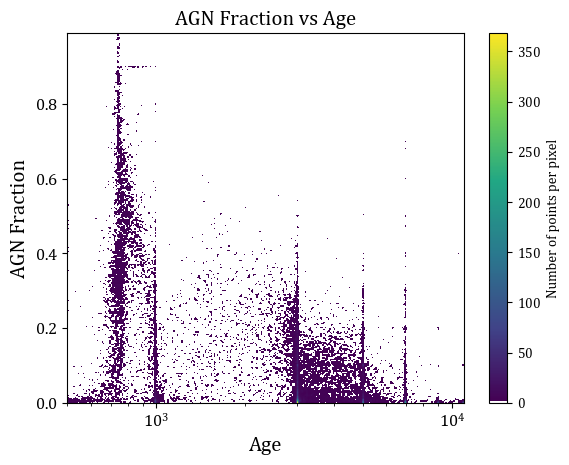

In [13]:
# Get AGN Fraction and Age
AGN_frac = df['bayes.agn.fracAGN']
age = df['bayes.sfh.age']

# Plot AGN Fraction vs Age
# plt.scatter(age, AGN_frac, s=1)
fig = plt.figure()
scatter_colour_density(fig, age, AGN_frac)
plt.title('AGN Fraction vs Age', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.show()

# AGN Fraction vs AGN Luminosity

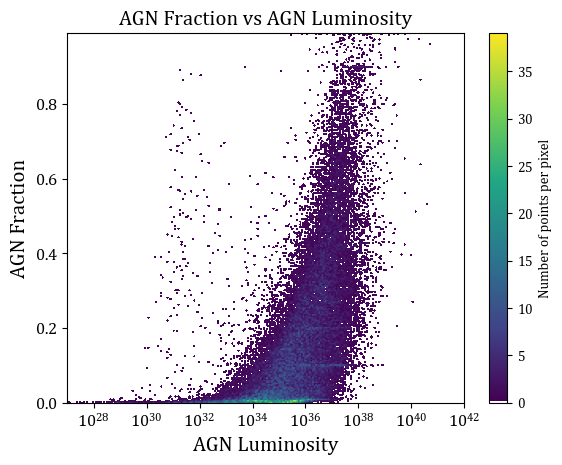

In [14]:
# Get AGN Fraction and AGN Luminosity
AGN_frac = df['bayes.agn.fracAGN']
AGN_lum = df['bayes.agn.luminosity']

# Plot AGN Fraction vs AGN Luminosity
# plt.scatter(AGN_lum, AGN_frac, s=1)
fig = plt.figure()
scatter_colour_density(fig, AGN_lum, AGN_frac)
plt.title('AGN Fraction vs AGN Luminosity', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.xlabel('AGN Luminosity', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.xlim(left=1e27, right=1e42)
plt.show()

# AGN Fraction vs Dust Luminosity

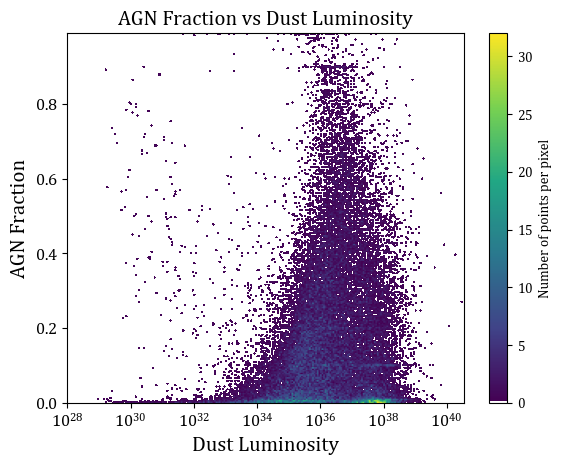

In [15]:
# Get AGN Fraction and Dust Luminosity
AGN_frac = df['bayes.agn.fracAGN']
dust_lum = df['bayes.dust.luminosity']

# Plot AGN Fraction vs Dust Luminosity
# plt.scatter(dust_lum, AGN_frac, s=1)
fig = plt.figure()
scatter_colour_density(fig, dust_lum, AGN_frac)
plt.title('AGN Fraction vs Dust Luminosity', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.xlabel('Dust Luminosity', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.xlim(left=1e28)
plt.show()

# AGN Fraction vs Stellar Luminosity

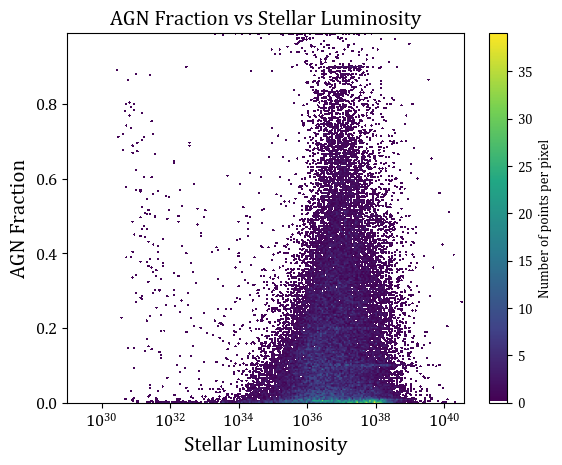

In [16]:
# Get AGN Fraction and Stellar Luminosity
AGN_frac = df['bayes.agn.fracAGN']
stellar_lum = df['bayes.stellar.lum']

# Plot AGN Fraction vs Stellar Luminosity
# plt.scatter(stellar_lum, AGN_frac, s=1)
fig = plt.figure()
scatter_colour_density(fig, stellar_lum, AGN_frac)
plt.title('AGN Fraction vs Stellar Luminosity', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.xlabel('Stellar Luminosity', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')
plt.xlim(left=1e29)
plt.show()

# AGN Fraction vs Redshift

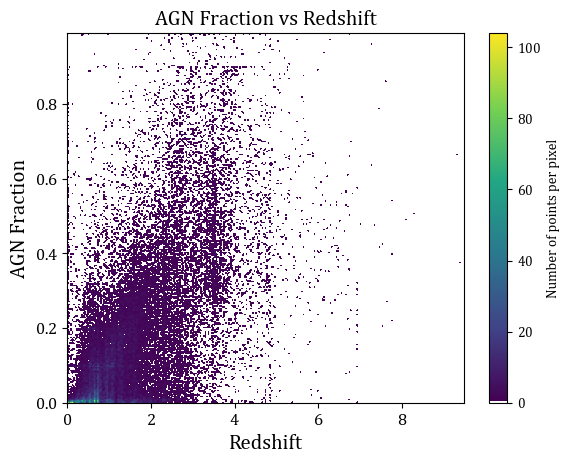

In [17]:
# Get AGN Fraction and Redshift
AGN_frac = df['bayes.agn.fracAGN']
redshift = df['bayes.universe.redshift']

# Plot AGN Fraction vs Redshift
fig = plt.figure()
scatter_colour_density(fig, redshift, AGN_frac, white_viridis)
plt.title('AGN Fraction vs Redshift', fontsize=15)
plt.ylabel('AGN Fraction', fontsize=15)
plt.xlabel('Redshift', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()